# Cosine Similarity for Measuring Similarity

In [1]:
import numpy as np 
import math 
import pandas as pd
from matplotlib import pyplot as plt 

# Returns the norm of a vector 
def norm(vec): 
    return math.sqrt( sum(pow(num,2) for num in vec) )   

# Vector of parameters: counts number of occurences of the words "vector", "calculus", and "graph" respectively 

book = [0]*4
book[0] = np.array([62,8,3]) #Sturm-Liouville Theory and Applications 
book[1] = np.array([1086,5,8]) #Linear Algebra Done Right 
book[2] = np.array([170,14,26]) #Real Analysis
book[3] = np.array([288,26,136]) #Math 22 Module 

# Query bias (should be positive numbers)
q = np.array([1,1,1])

# You can increase the value of a particular entry of q so that we have more bias towards that word. 
# Using [1,1,1] would mean that we put equal weight to all words (same thing if we use [2,2,2] or [3,3,3])

data2 = np.empty([4,4])
for i in range(4): 
    for j in range(4): 
        data2[i,j] = (np.dot( book[i], book[j] )) / (norm(book[i])*norm(book[j]))
        
data2 = pd.DataFrame(data2, index = ['Book 0','Book 1','Book 2','Book 3'], columns = ['Book 0','Book 1','Book 2','Book 3'] )

sim = pd.Series( [np.dot(book[i],q) / (norm(q)*norm(book[i])) for i in range(4)], index =  ['Book 0','Book 1','Book 2','Book 3'] )





In [2]:
sim

Book 0    0.673419
Book 1    0.584239
Book 2    0.702675
Book 3    0.813027
dtype: float64

In [3]:
data2

,Book 0,Book 1,Book 2,Book 3
Book 0,1.000000,0.991542,0.993617,0.923613
Book 1,0.991542,1.000000,0.986693,0.904726
Book 2,0.993617,0.986693,1.000000,0.958686
Book 3,0.923613,0.904726,0.958686,1.000000


# The Shoelace Formula for Computing Area


To get the $(x,y)$ position of a point in your image, you may upload your image to https://www.image-map.net/ and click on the desired points there. But before clicking on the points, upon uploading the image, make sure to set the Shape parameter to "Poly". Make sure as well that the way you click points is in a counter-clockwise rotation (otherwise, you will get a negative number as your area!). 

Once done, click the "Show Me The Code!" button, and copy the list of numbers in the ``coords`` variable. The coordinates are listed in the format $x_1,y_1,x_2,y_2,\ldots, x_n,y_n$, so make sure to fix the input data! The code below deals with that. 

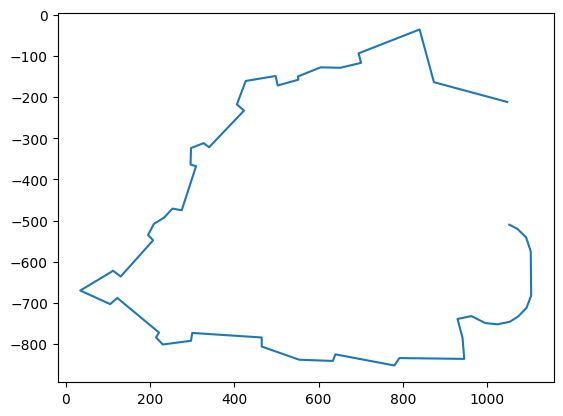

In [4]:
f = open("mapdata.txt")
raw = f.readline() 
f.close() 

data = [int(x) for x in raw.split(',')]
N = len(data) // 2 
x_coords = [0]*N 
y_coords = [0]*N 

for i in range(N):
    x_coords[i] , y_coords[i] = data[2*i], -data[2*i+1]
    

# Plots the points just to check if the outline is correct. 
plt.plot(x_coords, y_coords)

In [5]:
pixel_area = 0 
for i in range(N): 
    pixel_area += x_coords[i]*y_coords[(i+1)%N] - x_coords[(i+1)%N]*y_coords[i] 
pixel_area = 0.5*pixel_area
    
# Using the scaling in the image, it was found that 104 pixel length <-> 100 meters = 0.1 km 
# Hence the scaling factor is (0.1 km) / (104 pixel length)

scale_factor = 0.1 / 104 
unit = "km^2"

# Returns area in squared km 
true_area = pixel_area*(scale_factor**2)

print("The area is "+str(true_area)+' '+unit+'.')
    

The area is 0.5008667714497042 km^2.
